# DSSATTools modify cultivar parameters example notebook

The previous notebooks show how to create and modify Weather, Soil, and Experimental (management) options using an already defined Cultivar from the DSSAT cultivar files.

Now, this library was originaly created to automate the simulations when calibrating the cultivar parameters, then modifying such parameters is a key feature. That is what this notebook is about. We will use the Maize BRPI0202 experiment, treatment 1, to show how cultivar parameters are modified.

In [1]:
from DSSATTools import (
    crop, # module that contains the classes for the different crops.
    WeatherStation, # class needed to define the Weather. 
    SoilProfile, SoilLayer, # classes that define the entire soil profile, and the soil layers within the soil profile
    filex, # module that contains the clases for the FileX sections.
    DSSAT # the simulation environment class.
)
import pandas as pd
from datetime import datetime
import tempfile
import os

/home/diego/DSSATTools_notebooks/venv/lib/python3.10/site-packages/DSSATTools/__init__.py:105: DeprecationWarning: DSSATTools version 3.0.0 is a major upgrade and will not be backwards compatible with previous versions. If you are running code that was developed  using a previous DSSATTools version, then install DSSATTools version 2.1.6
  warnings.warn(


In the previous notebooks we manually defined most of the needed objects. In this case we will create them all by loading them directly from the DSSAT files if possible.

**Weather**

In [18]:
# Download Weather file
import urllib.request
response = urllib.request.urlopen('https://github.com/DSSAT/dssat-csm-data/blob/v4.8.2.0/Weather/BRPI0201.WTH?raw=true')
file_str = ''.join([l.decode('utf-8') for l in response])
with open('BRPI0201.WTH', 'w') as f:
    f.write(file_str)
# Create weather station from file
weather_station = WeatherStation.from_files(["BRPI0201.WTH",])
weather_station

WeatherStation(insi='BRPI', lat=-22.43, long=-47.25, elev=580.0, tav=21.6, amp=7.2, refht=nan, wndht=2.0, cco2=nan, table=
   DATE  SRAD  TMAX  TMIN  RAIN  DEWP  WIND   PAR  EVAP  RHUM 
2002001  11.3  28.2  19.6  21.6   -99   -99   -99   -99   -99
2002002  23.1  29.9  18.7   0.2   -99   -99   -99   -99   -99
2002003  27.0  31.6  19.5   0.0   -99   -99   -99   -99   -99
2002004  24.5  31.7  19.4   0.0   -99   -99   -99   -99   -99
2002005  22.5  31.7  19.6   0.0   -99   -99   -99   -99   -99
2002006  22.9  31.8  19.7  11.9   -99   -99   -99   -99   -99
...
...)

**Soil**

In [19]:
# Download file
response = urllib.request.urlopen('https://github.com/DSSAT/dssat-csm-data/blob/v4.8.2.0/Soil/BR.SOL?raw=true')
file_str = ''.join([l.decode('utf-8') for l in response])
with open('BR.SOL', 'w') as f:
    f.write(file_str)
# Create soil profile
soil = SoilProfile.from_file("BRPI020001", "BR.SOL")
soil

SoilProfile(name='BRPI020001', soil_data_source='ESALQ', soil_clasification='C', soil_depth=120.0, soil_series_name='TERRA ROXA (RAINFED)', site='PIRACICABA', country='BRAZIL', lat=-22.43, long=-47.25, scs_family='Typic Eutrudox', scom='R', salb=0.14, slu1=6.0, sldr=0.3, slro=83.0, slnf=1.0, slpf=0.9, smhb='IB00', smpx='IB00', smke='IB00', table=
  SLB SLMH   SLLL  SDUL  SSAT  SRGF  SSKS  SBDM  SLOC  SLCL  SLSI  SLCF  SLNI  SLHW  SLHB  SCEC  SADC  SLPX  SLPT  SLPO CACO3  SLAL  SLFE  SLMN  SLBS  SLPA  SLPB  SLKE  SLMG  SLNA  SLSU  SLEC  SLCA 
   20 A     0.170 0.280 0.450 1.000  0.10  0.90  1.40  61.0  17.0   0.0 0.100   5.0   -99  10.0   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99
   40 AA    0.180 0.290 0.450 1.000  0.10  0.90  1.10  61.0  19.0   0.0 0.100   5.0   -99   9.0   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99   -99
  120 AB    0.180 0.280 0.460 0.600  0.10  1.10  1.40  6

**FileX (Management and options)**

In [20]:
# Download file
response = urllib.request.urlopen('https://github.com/DSSAT/dssat-csm-data/blob/v4.8.2.0/Maize/BRPI0202.MZX?raw=true')
file_str = ''.join([l.decode('utf-8') for l in response])
with open('BRPI0202.MZX', 'w') as f:
    f.write(file_str)
    
all_treatments = filex.read_filex('BRPI0202.MZX')
treatment = all_treatments[1]
treatment

{'Cultivar': Cultivar(cr='MZ', ingeno='IB0171', cname='AG9010'),
 'Field': Field(id_field='BRPI0001', wsta='BRPI0201', flsa=nan, flob=0.0, fldt='DR000', fldd=0.0, flds=0.0, flst='00000', sltx='', sldp=120.0, id_soil='BRPI020001', flname='RAINFED EXPERIMENT', xcrd=0.0, ycrd=0.0, elev=0.0, area=0.0, slen=0.0, flwr=0.0, slas=0.0, flhst='', fhdur=nan),
 'InitialConditions': InitialConditions(pcr='MZ', icdat=DateType(2002, 3, 1), icrt=nan, icnd=nan, icrn=1.0, icre=1.0, icwd=nan, icres=5100.0, icren=1.5, icrep=nan, icrip=100.0, icrid=15.0, icname='rainfed', table=
  ICBL  SH2O  SNH4  SNO3 
    20 0.250   0.4   3.9
    40 0.250   0.4   3.9
   120 0.260   0.4   3.9
 ),
 'Planting': Planting(pdate=DateType(2002, 3, 13), edate=DateType(2002, 3, 19), ppop=7.0, ppoe=5.0, plme='S', plds='R', plrs=80.0, plrd=45.0, pldp=5.0, plwt=nan, page=nan, penv=nan, plph=nan, sprl=0.0, plname=''),
 'Fertilizer': Fertilizer(, table=
 FDATE  FMCD  FACD  FDEP  FAMN  FAMP  FAMK  FAMC  FAMO  FOCD FERNAME          
 0

We want now to create each invidual section from this dictionary. You can see that in `treatment` field has the weather station and soil profile defined as their codes or ids. Then we have to redefine those parameters to the weather station and soil profile objects:

In [21]:
field = treatment['Field']
# Redefine the weather station and soil profile fields
field['wsta'] = weather_station
field['id_soil'] = soil

In [22]:
# Get each section from the treatment dict
planting = treatment['Planting']
initial_conditions = treatment['InitialConditions']
fertilizer = treatment['Fertilizer']
simulation_controls = treatment['SimulationControls']

**Cultivar**

Now, the cultivar from the FileX is defined as a FileX section, and not as a cultivar object, then we have to create that object based on the contents of the Cultivar section in the FileX: 

In [23]:
treatment['Cultivar']

Cultivar(cr='MZ', ingeno='IB0171', cname='AG9010')

In [24]:
cultivar = crop.Maize('IB0171')
cultivar

CropPars(vrname='AG9010', expno='.', eco#=CropPars(econame='GENERIC MIDWEST1', tbase=8.0, topt=34.0, ropt=34.0, p20=12.5, djti=4.0, gdde=6.0, dsgft=170.0, rue=4.2, kcan=0.85, tsen=nan, cday=nan), p1=196.0, p2=0.5, p5=758.0, g2=830.0, g3=5.1, phint=40.0)

**Run the control scenario**

The control scenario will be the scenario with the original cultivar parameters. Then we will tweak one of the phenology parameters to run alternative scenarios.

In [25]:
TMP = tempfile.tempdir
dssat = DSSAT(os.path.join(TMP, 'dssat_test'))
results = {} # A dicitonary to save the results
results["Control"] = dssat.run_treatment(
    field=field, cultivar=cultivar, planting=planting, initial_conditions=initial_conditions,
    fertilizer=fertilizer, simulation_controls=simulation_controls,
)

/tmp/dssat_test created.

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 MZ   1  53 118  8882  3681   391     0   355     0   111    42  12351  169


**Run for different values of p1 parameter**

The cultivar parameters can be modified by assigning the parameter directly:

In [27]:
cultivar['p1'] = 196

Ecotype parameters are modified in a similar way:

In [28]:
cultivar['eco#']['tbase'] = 8.0

Note that we did not change the values of those parameters as we assigned the same original values. Now we will change the p1 parameter, run the simulations, and save the results.

In [29]:
p1_values = (150, 160, 170, 180, 190, 200, 210)
for p1 in p1_values:
    cultivar['p1'] = p1
    results[f"p1={p1}"] = dssat.run_treatment(
        field=field, cultivar=cultivar, planting=planting, initial_conditions=initial_conditions,
        fertilizer=fertilizer, simulation_controls=simulation_controls,
    )


RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 MZ   1  48 110  8663  3669   391     0   354     1   104    48  12352  169

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 MZ   1  51 113  8901  3730   391     0   355     0   109    44  12352  169

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 MZ   1  51 113  8902  3730   391     0   355     0   109    44  12352  169

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 MZ   1  53 118  8880  3681   391     0   355     0   111    42  12351  169

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CE

In [32]:
results_df = pd.DataFrame(results).T
results_df.index.str.split('=')

,flo,mat,topwt,harwt,rain,tirr,cet,pesw,tnup,tnlf,tson,tsoc
Control,53,118,8882,3681,391,0,355,0,111,42,12351,169
p1=150,48,110,8663,3669,391,0,354,1,104,48,12352,169
p1=160,51,113,8901,3730,391,0,355,0,109,44,12352,169
p1=170,51,113,8902,3730,391,0,355,0,109,44,12352,169
p1=180,53,118,8880,3681,391,0,355,0,111,42,12351,169
p1=190,53,118,8865,3676,391,0,355,0,111,43,12351,169
p1=200,55,123,8640,3002,395,0,359,0,118,37,12350,169
p1=210,55,123,8635,2997,395,0,359,0,118,37,12350,169


**Compare results**

Now we can compare the difference in yield, and days to maturity for the different values of p1:

Text(0, 0.5, 'Grain weight at harvest (kg/ha)')

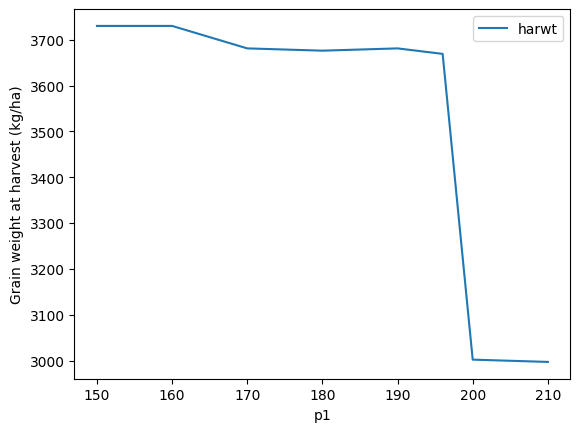

In [40]:
results_df.loc[:, 'p1'] = [196] + list(p1_values) 
results_df = results_df.sort_values(by='p1')
ax = results_df.plot(x='p1', y='harwt')
ax.set_ylabel("Grain weight at harvest (kg/ha)")

Text(0, 0.5, 'Days to maturity')

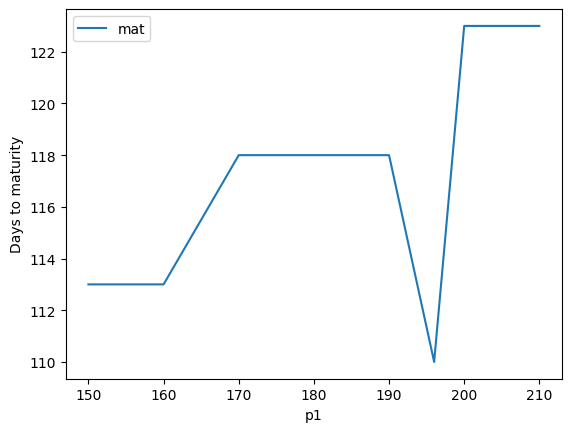

In [41]:
ax = results_df.plot(x='p1', y='mat')
ax.set_ylabel("Days to maturity")

So we modified the p1 parameter, and plot what is the effect of modifying that parameter on the final harvest and time to harvest.